In [31]:
#This file consists of Implementing K-nearest neioghbours from scratch without using sklearn library or any implementation library.

In [32]:
#importing required libraries
import numpy as np
import pandas as pd

In [33]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [34]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
corr_matrix = train_df.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [36]:
#This is required because we want to visualize this data set with a numeric value so determining the data type of each feature
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
#There are too many missing values in cabin features, we can consider to drop this feature. Sex and Emabrked seems the features that need to investigate at this point
train_df["Embarked"] = train_df["Embarked"].fillna("s")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
#importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns


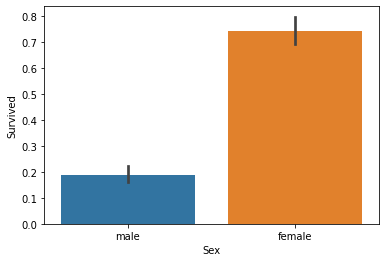

In [39]:
sns.barplot(
    data = train_df,
    x='Sex',
    y='Survived'
)
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

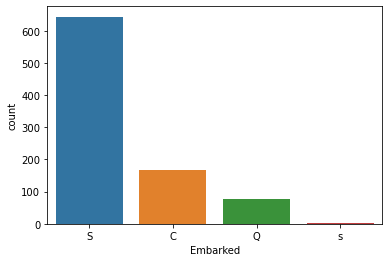

In [40]:
#It is obviously that female has much higher survival rate than male
sns.countplot(train_df['Embarked'])

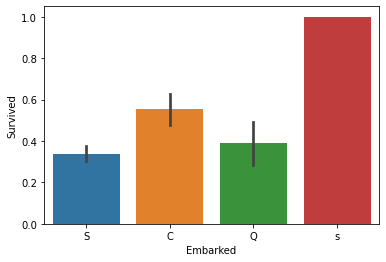

In [41]:
sns.barplot(
    data = train_df,
    x='Embarked',
    y='Survived'
)
plt.show()

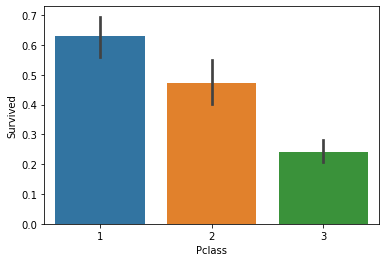

In [42]:
sns.barplot(
    data = train_df,
    x='Pclass',
    y='Survived'
)
plt.show()

In [94]:
from sklearn.metrics import accuracy_score
from collections import Counter
import pandas as pd 
import numpy as np 
import itertools
import random 
import warnings
warnings.filterwarnings("ignore")
random.seed(0)

# Read the data 
train_df = pd.read_csv('train.csv')
test_df =  pd.read_csv('test.csv')

# Join the train and test dataframes so the data preprocessing 
# will be done simultaneously in both datasets 
full_df = train_df.append(test_df, ignore_index=True)

In [95]:
def data_preprocessing(df):
  
  # Label-encode the sex of a passenger 
  df['Sex'] = df['Sex'].replace(['male'],0)
  df['Sex'] = df['Sex'].replace(['female'],1)

  # Initialize new columns 
  df['title'] = np.NaN
  df['alone'] = np.NaN
  df['cabin_class'] = np.NaN

  # Identify if a passenger is alone in the ship 
  for i,_ in enumerate(df['alone']):
    if df['SibSp'][i] + df['Parch'][i] == 0:
      df['alone'][i] = 1
    else:
      df['alone'][i] = 0 
    
    # Handle missing values
  cols = ['SibSp','Parch','Fare','Age']
  for col in cols:
    df[col].fillna(df[col].median(), inplace = True)
    
  # Feature-engineer the cabin-class 
  for i,row in enumerate(df['Cabin']):
    # Get cabin class 
    df['cabin_class'][i] =  str(row)[:1]

  # Count the cabin distribution per class (if available) 
  cabin_distribution = {}
  count = 0 
  for row in df['cabin_class']:
    if row != 'n':
      count += 1 
      if row not in cabin_distribution:
        cabin_distribution[row] = 1 
      else:
        cabin_distribution[row] +=1 
        
        # Calculate the probability of being in a sepcific cabin-class  
  cabin_pdf = {k:v / count for k, v in cabin_distribution.items()}

  # Calculate the cumulative probability of being in a specific cabin-class 
  keys, vals = cabin_pdf.keys(), cabin_pdf.values()
  cabin_cdf = dict(zip(keys, itertools.accumulate(vals)))
  cabin_cdf = sorted(cabin_cdf.items(), key=lambda x: x[1])    

  # Randomly assign cabin-classes to passengers that are missing the cabin 
  # field, based on the probabilities calculated above 
  for i,row in enumerate(df['cabin_class']):
    random_num = random.random()
    if row == 'n':
      if random_num < cabin_cdf[0][1]:
        df['cabin_class'][i] =  cabin_cdf[0][0]
      elif cabin_cdf[0][1] <= random_num < cabin_cdf[1][1]:
        df['cabin_class'][i] =  cabin_cdf[1][0]

      elif cabin_cdf[1][1] <= random_num < cabin_cdf[2][1]:
        df['cabin_class'][i] =  cabin_cdf[2][0]
        
      elif cabin_cdf[2][1] <= random_num < cabin_cdf[3][1]:
        df['cabin_class'][i] =  cabin_cdf[2][0]

      elif cabin_cdf[3][1] <= random_num < cabin_cdf[4][1]:
        df['cabin_class'][i] =  cabin_cdf[3][0]

      elif cabin_cdf[3][1] <= random_num < cabin_cdf[4][1]:
        df['cabin_class'][i] =  cabin_cdf[4][0]

      elif cabin_cdf[4][1] <= random_num < cabin_cdf[5][1]:
        df['cabin_class'][i] =  cabin_cdf[4][0]
      
      elif cabin_cdf[5][1] <= random_num < cabin_cdf[6][1]:
        df['cabin_class'][i] =  cabin_cdf[5][0]

      elif cabin_cdf[6][1] <= random_num < cabin_cdf[7][1]:
        df['cabin_class'][i] =  cabin_cdf[6][0]
      else:
        df['cabin_class'][i] = cabin_cdf[7][0]
        
         # Perform feature engineering to obtain additional title-info 
  for i,row in enumerate(df['Name']):
    # Get person's title 
    df['title'][i] = row.split(',')[1].split('.')[0]

  # Embarked one-hot encoding 
  embarked_dummies = pd.get_dummies(df.Embarked, prefix='Embarked')
  df = pd.concat([df, embarked_dummies], axis=1)

  # Person's title one-hot encoding 
  title_dummies = pd.get_dummies(df.title, prefix='title')
  df = pd.concat([df, title_dummies], axis=1)

  # Cabin class one-hot encoding 
  cabin_class_dummies = pd.get_dummies(df.cabin_class, prefix = 'cabin_class')
  df = pd.concat([df, cabin_class_dummies], axis = 1)

#Remove unecessary columns 
  del df['Name']
  del df['PassengerId']
  del df['title']
  del df['Embarked']
  del df['Cabin']
  del df['Ticket']
  del df['cabin_class']

  return df 

In [96]:
# Preprocess the data and create the train / test sets 
full_df = data_preprocessing(full_df)
X_train = full_df[:891]
y_train = full_df['Survived'][:891]
X_test = full_df[891:]
del X_train['Survived']
del X_test['Survived']


print(f'After preprocessing there are {X_train.shape[0]} rows and {X_train.shape[1]} columns in the training data.\n')
print(f'After preprocessing there are {X_test.shape[0]} rows and {X_test.shape[1]} columns in the test data.')

After preprocessing there are 891 rows and 36 columns in the training data.

After preprocessing there are 418 rows and 36 columns in the test data.


In [97]:
# Since we are not going to be using any fancy modules for our algorithm 
# we will be converting our data from pandas dataframe to python lists. 
X_train = X_train.values.tolist()
X_test = X_test.values.tolist()

In [102]:
class KNearestNeighbors():
    def __init__(self,k):
        self.k = k 
        self.X_train = None  
        self.classes = []
    
    @staticmethod 
    def euclidean_distance(row1,row2):
      sum = 0
      for i,j in zip(row1,row2):
        sum += (i-j) ** 2 
      distance = sum ** 0.5 
      return distance
    
    def _predict(self,classes,distances,k):
      # Sort in descending order the distances and retrieve the index 
      # which maps to their corresponding class 
      idxs = sorted(range(len(distances)),key = lambda x:distances[x])[:self.k] 
      # Finding the class for each neighbor  
      neighbors = [self.classes[idx] for idx in idxs]
      # Choosing the most ocurring class 
      prediction = Counter(neighbors).most_common(1) # bit of a cheat here :)
      return prediction[0][0]

    def fit(self,X_train,y_train):
        self.X_train = X_train
        predictions = []
        # For each passenger in the training dataset:
        for i in range(len(X_train)):
            distances = []
            classes = []
            # Estimate the Euclidean distance for the current 
            # passenger with all the other passengers 
            for x,y in zip(X_train,y_train):
                distances.append(self.euclidean_distance(X_train[i],x))
                # Append the class that corresponds to the current passenger
                self.classes.append(y)
            # Predict the class for the current passenger 
            prediction = self._predict(self.classes,distances,self.k)
            predictions.append(prediction)
        print(f'Utilizing {self.k} groups of nearest-neighbors the training accuracy is at {round(accuracy_score(predictions,y_train)*100,2)}%.')
        return predictions   

    def predict(self,X_test):
        # Predictions for the test data 
        predictions = []
        for i in range(len(X_test)):
            distances = []
            for x in self.X_train:
                distances.append(self.euclidean_distance(X_test[i],x))
            prediction = self._predict(self.classes,distances,self.k)
            predictions.append(prediction)
        return predictions 


In [103]:
# Choosing an arbritrary number for k to be 4 
KNN = KNearestNeighbors(k=4)
KNN.fit(X_train,y_train)
predictions = KNN.predict(X_test)

Utilizing 4 groups of nearest-neighbors the training accuracy is at 88.78%.
